In [109]:
import matplotlib.pyplot as plt  # for making figures
import torch
import torch.nn.functional as F

%matplotlib inline

from typing import List

import numpy as np

In [3]:
# read in all the words
words = open("./datasets/name.txt", "r").read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [4]:
len(words)

32033

In [6]:
chars = sorted(list(set("".join(words))))
stoi = {s: i + 1 for i, s in enumerate(chars)}
stoi["."] = 0
itos = {i: s for s, i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [54]:
BLOCK_SIZE = 3
EMB_SIZE = 2

In [7]:
BLOCK_SIZE = 3
X, Y = [], []
for w in words[:5]:
    print(w)
    context = [0] * BLOCK_SIZE
    for ch in w + ".":
        print(context)
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(ix)
        print("".join(itos[i] for i in context), "->", itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

emma
[0, 0, 0]
5
... -> e
[0, 0, 5]
13
..e -> m
[0, 5, 13]
13
.em -> m
[5, 13, 13]
1
emm -> a
[13, 13, 1]
0
mma -> .
olivia
[0, 0, 0]
15
... -> o
[0, 0, 15]
12
..o -> l
[0, 15, 12]
9
.ol -> i
[15, 12, 9]
22
oli -> v
[12, 9, 22]
9
liv -> i
[9, 22, 9]
1
ivi -> a
[22, 9, 1]
0
via -> .
ava
[0, 0, 0]
1
... -> a
[0, 0, 1]
22
..a -> v
[0, 1, 22]
1
.av -> a
[1, 22, 1]
0
ava -> .
isabella
[0, 0, 0]
9
... -> i
[0, 0, 9]
19
..i -> s
[0, 9, 19]
1
.is -> a
[9, 19, 1]
2
isa -> b
[19, 1, 2]
5
sab -> e
[1, 2, 5]
12
abe -> l
[2, 5, 12]
12
bel -> l
[5, 12, 12]
1
ell -> a
[12, 12, 1]
0
lla -> .
sophia
[0, 0, 0]
19
... -> s
[0, 0, 19]
15
..s -> o
[0, 19, 15]
16
.so -> p
[19, 15, 16]
8
sop -> h
[15, 16, 8]
9
oph -> i
[16, 8, 9]
1
phi -> a
[8, 9, 1]
0
hia -> .


In [12]:
BLOCK_SIZE = 10
X, Y = [], []
for w in words[:5]:
    context = [0] * BLOCK_SIZE
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print("".join(itos[i] for i in context), itos[ix])
        context = context[1:] + [ix]
X = torch.tensor(X)
Y = torch.tensor(Y)

.......... e
.........e m
........em m
.......emm a
......emma .
.......... o
.........o l
........ol i
.......oli v
......oliv i
.....olivi a
....olivia .
.......... a
.........a v
........av a
.......ava .
.......... i
.........i s
........is a
.......isa b
......isab e
.....isabe l
....isabel l
...isabell a
..isabella .
.......... s
.........s o
........so p
.......sop h
......soph i
.....sophi a
....sophia .


In [13]:
BLOCK_SIZE = 3
X, Y = [], []
for w in words[:5]:
    context = [0] * BLOCK_SIZE
    for ch in w + ".":
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [14]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [15]:
F.one_hot(torch.arange(27), num_classes=27).shape

torch.Size([27, 27])

In [16]:
C = torch.randn((27, EMB_SIZE))

In [17]:
C

tensor([[ 1.3170,  0.5946],
        [ 1.0713, -1.6564],
        [-1.2470,  0.5571],
        [-0.0202,  0.5827],
        [ 0.8649, -0.0592],
        [ 0.7613, -0.7586],
        [ 1.7205, -0.0341],
        [-0.6721,  0.0953],
        [-0.4191, -0.8333],
        [-0.3981,  0.3624],
        [-0.1542,  1.8634],
        [-1.5904, -0.2830],
        [ 0.2474,  0.9643],
        [-0.4328,  0.2430],
        [ 2.5164,  0.3521],
        [-0.5409, -0.8304],
        [ 0.8897,  0.1350],
        [ 0.6782,  0.5675],
        [ 0.2503,  1.2682],
        [-0.3568, -0.3647],
        [ 1.5845, -2.6051],
        [ 0.7841,  0.3866],
        [-0.4794,  0.8110],
        [-0.1559, -1.5216],
        [ 0.1263,  0.5814],
        [ 0.7930, -0.4308],
        [ 0.7126,  0.4777]])

In [18]:
F.one_hot(torch.tensor(5), num_classes=27) @ C

RuntimeError: expected scalar type Long but found Float

In [19]:
C[5]

tensor([ 0.7613, -0.7586])

In [20]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([ 0.7613, -0.7586])

In [21]:
C[[5, 6, 7]]

tensor([[ 0.7613, -0.7586],
        [ 1.7205, -0.0341],
        [-0.6721,  0.0953]])

In [22]:
C[torch.tensor([5, 6, 7])]

tensor([[ 0.7613, -0.7586],
        [ 1.7205, -0.0341],
        [-0.6721,  0.0953]])

In [40]:
C[0]

tensor([ 0.9121, -0.5878])

In [41]:
X.shape

torch.Size([32, 3])

In [23]:
X

tensor([[ 0,  0,  0],
        [ 0,  0,  5],
        [ 0,  5, 13],
        [ 5, 13, 13],
        [13, 13,  1],
        [ 0,  0,  0],
        [ 0,  0, 15],
        [ 0, 15, 12],
        [15, 12,  9],
        [12,  9, 22],
        [ 9, 22,  9],
        [22,  9,  1],
        [ 0,  0,  0],
        [ 0,  0,  1],
        [ 0,  1, 22],
        [ 1, 22,  1],
        [ 0,  0,  0],
        [ 0,  0,  9],
        [ 0,  9, 19],
        [ 9, 19,  1],
        [19,  1,  2],
        [ 1,  2,  5],
        [ 2,  5, 12],
        [ 5, 12, 12],
        [12, 12,  1],
        [ 0,  0,  0],
        [ 0,  0, 19],
        [ 0, 19, 15],
        [19, 15, 16],
        [15, 16,  8],
        [16,  8,  9],
        [ 8,  9,  1]])

In [39]:
C[X]

tensor([[[ 0.9121, -0.5878],
         [ 0.9121, -0.5878],
         [ 0.9121, -0.5878]],

        [[ 0.9121, -0.5878],
         [ 0.9121, -0.5878],
         [-0.1624,  1.9454]],

        [[ 0.9121, -0.5878],
         [-0.1624,  1.9454],
         [ 0.3177, -0.2526]],

        [[-0.1624,  1.9454],
         [ 0.3177, -0.2526],
         [ 0.3177, -0.2526]],

        [[ 0.3177, -0.2526],
         [ 0.3177, -0.2526],
         [ 2.1288, -0.1887]],

        [[ 0.9121, -0.5878],
         [ 0.9121, -0.5878],
         [ 0.9121, -0.5878]],

        [[ 0.9121, -0.5878],
         [ 0.9121, -0.5878],
         [ 1.2811,  0.7738]],

        [[ 0.9121, -0.5878],
         [ 1.2811,  0.7738],
         [ 2.1626, -0.9869]],

        [[ 1.2811,  0.7738],
         [ 2.1626, -0.9869],
         [-0.6958,  0.8884]],

        [[ 2.1626, -0.9869],
         [-0.6958,  0.8884],
         [ 0.8196,  0.5701]],

        [[-0.6958,  0.8884],
         [ 0.8196,  0.5701],
         [-0.6958,  0.8884]],

        [[ 0.8196,  0

In [42]:
C[X].shape

torch.Size([32, 3, 2])

In [45]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [47]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

In [48]:
emb @ W1 + b1

RuntimeError: mat1 and mat2 shapes cannot be multiplied (96x2 and 6x100)

In [49]:
emb[:, 0, :].shape

torch.Size([32, 2])

In [51]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:, 2, :]], dim=1)

torch.Size([32, 6])

In [52]:
torch.cat([emb[:, b, :] for b in range(BLOCK_SIZE)], dim=1)

tensor([[ 0.9121, -0.5878,  0.9121, -0.5878,  0.9121, -0.5878],
        [ 0.9121, -0.5878,  0.9121, -0.5878, -0.1624,  1.9454],
        [ 0.9121, -0.5878, -0.1624,  1.9454,  0.3177, -0.2526],
        [-0.1624,  1.9454,  0.3177, -0.2526,  0.3177, -0.2526],
        [ 0.3177, -0.2526,  0.3177, -0.2526,  2.1288, -0.1887],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  0.9121, -0.5878],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  1.2811,  0.7738],
        [ 0.9121, -0.5878,  1.2811,  0.7738,  2.1626, -0.9869],
        [ 1.2811,  0.7738,  2.1626, -0.9869, -0.6958,  0.8884],
        [ 2.1626, -0.9869, -0.6958,  0.8884,  0.8196,  0.5701],
        [-0.6958,  0.8884,  0.8196,  0.5701, -0.6958,  0.8884],
        [ 0.8196,  0.5701, -0.6958,  0.8884,  2.1288, -0.1887],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  0.9121, -0.5878],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  2.1288, -0.1887],
        [ 0.9121, -0.5878,  2.1288, -0.1887,  0.8196,  0.5701],
        [ 2.1288, -0.1887,  0.8196,  0.5

In [56]:
len(torch.unbind(emb, dim=1))

3

In [58]:
torch.cat(torch.unbind(emb, dim=1), dim=1).shape

torch.Size([32, 6])

In [60]:
a = np.array([[1, 2, 3], [4, 5, 6]])

In [61]:
a.shape

(2, 3)

In [67]:
a.reshape(3, 1, 1, 2, 1)

array([[[[[1],
          [2]]]],



       [[[[3],
          [4]]]],



       [[[[5],
          [6]]]]])

In [68]:
a = torch.arange(18)

In [69]:
a.shape

torch.Size([18])

In [73]:
a.view(3, 2, 3, 1)

tensor([[[[ 0],
          [ 1],
          [ 2]],

         [[ 3],
          [ 4],
          [ 5]]],


        [[[ 6],
          [ 7],
          [ 8]],

         [[ 9],
          [10],
          [11]]],


        [[[12],
          [13],
          [14]],

         [[15],
          [16],
          [17]]]])

In [74]:
a.storage()

 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [75]:
emb.reshape(32, 6)

tensor([[ 0.9121, -0.5878,  0.9121, -0.5878,  0.9121, -0.5878],
        [ 0.9121, -0.5878,  0.9121, -0.5878, -0.1624,  1.9454],
        [ 0.9121, -0.5878, -0.1624,  1.9454,  0.3177, -0.2526],
        [-0.1624,  1.9454,  0.3177, -0.2526,  0.3177, -0.2526],
        [ 0.3177, -0.2526,  0.3177, -0.2526,  2.1288, -0.1887],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  0.9121, -0.5878],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  1.2811,  0.7738],
        [ 0.9121, -0.5878,  1.2811,  0.7738,  2.1626, -0.9869],
        [ 1.2811,  0.7738,  2.1626, -0.9869, -0.6958,  0.8884],
        [ 2.1626, -0.9869, -0.6958,  0.8884,  0.8196,  0.5701],
        [-0.6958,  0.8884,  0.8196,  0.5701, -0.6958,  0.8884],
        [ 0.8196,  0.5701, -0.6958,  0.8884,  2.1288, -0.1887],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  0.9121, -0.5878],
        [ 0.9121, -0.5878,  0.9121, -0.5878,  2.1288, -0.1887],
        [ 0.9121, -0.5878,  2.1288, -0.1887,  0.8196,  0.5701],
        [ 2.1288, -0.1887,  0.8196,  0.5

In [77]:
emb.reshape(32, 6) == torch.cat(torch.unbind(emb, dim=1), dim=1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [78]:
h = emb.view(32, 6) @ W1 + b1

In [80]:
h.shape

torch.Size([32, 100])

In [37]:
np.arange(27).reshape(3, 8)

ValueError: cannot reshape array of size 27 into shape (3,8)

In [32]:
a = np.arange(20).reshape(2, 5, 2)
a.reshape(-1, 2, 5, 1)

array([[[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4]],

        [[ 5],
         [ 6],
         [ 7],
         [ 8],
         [ 9]]],


       [[[10],
         [11],
         [12],
         [13],
         [14]],

        [[15],
         [16],
         [17],
         [18],
         [19]]]])

In [51]:
NUMBER_OF_BLOCKS = 3
EMB_SIZE = 2
h = emb.view(-1, NUMBER_OF_BLOCKS * EMB_SIZE) @ W1 + b1
h

tensor([[ 2.8280, -2.1367,  1.8687,  ...,  1.7123, -1.2580, -2.7837],
        [ 1.8295, -1.6124,  2.6103,  ...,  1.0200, -1.5439, -3.7947],
        [-1.3097, -1.6592,  4.7015,  ..., -1.4087,  1.5639, -1.3549],
        ...,
        [-1.9521, -2.0578, -0.2516,  ...,  0.1754,  0.5395, -0.5863],
        [-2.8772,  0.5714,  3.2711,  ..., -0.1372,  1.9668,  0.1971],
        [-0.6375,  1.7500, -1.9485,  ...,  3.9826, -0.5620, -1.5247]])

In [52]:
h = emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1
h

tensor([[ 2.8280, -2.1367,  1.8687,  ...,  1.7123, -1.2580, -2.7837],
        [ 1.8295, -1.6124,  2.6103,  ...,  1.0200, -1.5439, -3.7947],
        [-1.3097, -1.6592,  4.7015,  ..., -1.4087,  1.5639, -1.3549],
        ...,
        [-1.9521, -2.0578, -0.2516,  ...,  0.1754,  0.5395, -0.5863],
        [-2.8772,  0.5714,  3.2711,  ..., -0.1372,  1.9668,  0.1971],
        [-0.6375,  1.7500, -1.9485,  ...,  3.9826, -0.5620, -1.5247]])

In [62]:
W1 = torch.randn((6, 100))
b1 = torch.randn(100)

W2 = torch.randn((100, 27))
b2 = torch.randn(27)

In [58]:
h = torch.tanh(emb.view(-1, BLOCK_SIZE * EMB_SIZE) @ W1 + b1)

In [68]:
W2.shape

torch.Size([100, 27])

In [67]:
h.shape

torch.Size([32, 100])

In [78]:
logits = h @ W2 + b2

Text(0.5, 1.0, 'LOGITS')

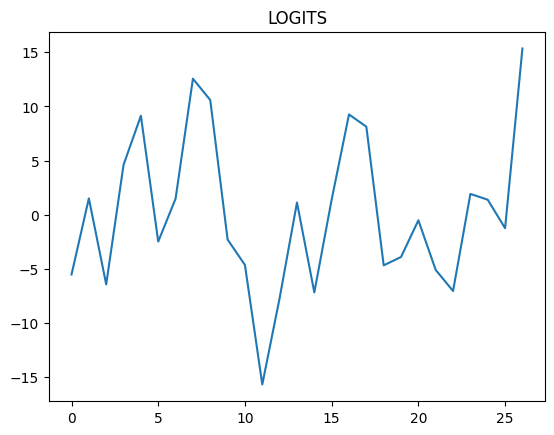

In [85]:
plt.plot(logits.detach().numpy()[0])
plt.title("LOGITS")

Text(0.5, 1.0, 'COUNTS')

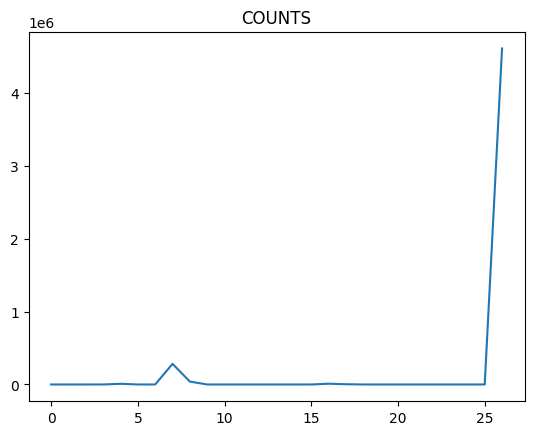

In [84]:
plt.plot(logits.exp().detach().numpy()[0])
plt.title("COUNTS")

Text(0.5, 1.0, 'PROBS')

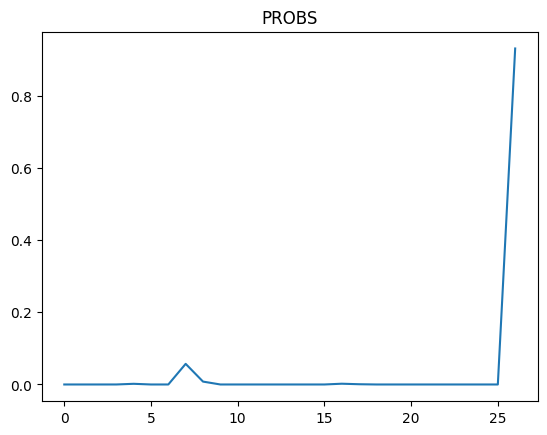

In [86]:
counts = logits.exp()
plt.plot((counts / counts.sum(1, keepdim=True)).detach().numpy()[0])
plt.title("PROBS")

Text(0.5, 1.0, 'PROBS')

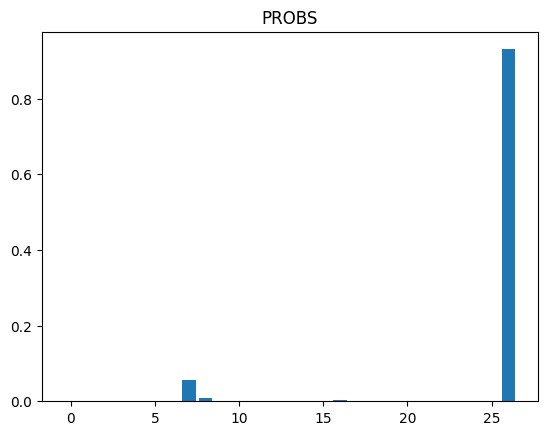

In [87]:
counts = logits.exp()
plt.bar(np.arange(27), (counts / counts.sum(1, keepdim=True)).detach().numpy()[0])
plt.title("PROBS")

In [90]:
probs = counts / counts.sum(1, keepdim=True)
probs.shap

torch.Size([32, 27])

In [92]:
probs[0][5]

tensor(1.6918e-08)

In [94]:
Y

tensor([ 5, 13, 13,  1,  0, 15, 12,  9, 22,  9,  1,  0,  1, 22,  1,  0,  9, 19,
         1,  2,  5, 12, 12,  1,  0, 19, 15, 16,  8,  9,  1,  0])

In [95]:
probs[torch.arange(32), Y]

tensor([1.6918e-08, 2.7656e-05, 3.6840e-10, 2.3086e-02, 2.5494e-07, 8.1649e-07,
        5.2969e-03, 3.8288e-16, 3.7099e-14, 1.9492e-15, 1.0479e-02, 2.8991e-07,
        9.1210e-07, 9.7235e-06, 1.3290e-11, 4.7354e-05, 2.0435e-08, 1.1570e-09,
        2.0118e-04, 6.6181e-10, 9.9199e-01, 1.0416e-08, 9.7111e-09, 1.1975e-05,
        6.7149e-09, 4.0769e-09, 9.7368e-07, 3.7293e-09, 5.2455e-08, 9.6379e-01,
        6.8371e-07, 3.9304e-07])

In [ ]:
# log(x) * log(y) = log(x * y) = log(x) + log(y)

In [99]:
probs[np.arange(32), Y]

tensor([1.6918e-08, 2.7656e-05, 3.6840e-10, 2.3086e-02, 2.5494e-07, 8.1649e-07,
        5.2969e-03, 3.8288e-16, 3.7099e-14, 1.9492e-15, 1.0479e-02, 2.8991e-07,
        9.1210e-07, 9.7235e-06, 1.3290e-11, 4.7354e-05, 2.0435e-08, 1.1570e-09,
        2.0118e-04, 6.6181e-10, 9.9199e-01, 1.0416e-08, 9.7111e-09, 1.1975e-05,
        6.7149e-09, 4.0769e-09, 9.7368e-07, 3.7293e-09, 5.2455e-08, 9.6379e-01,
        6.8371e-07, 3.9304e-07])

In [103]:
probs[np.arange(32), Y].log()

tensor([-1.7895e+01, -1.0496e+01, -2.1722e+01, -3.7685e+00, -1.5182e+01,
        -1.4018e+01, -5.2406e+00, -3.5499e+01, -3.0925e+01, -3.3871e+01,
        -4.5584e+00, -1.5054e+01, -1.3908e+01, -1.1541e+01, -2.5044e+01,
        -9.9579e+00, -1.7706e+01, -2.0577e+01, -8.5113e+00, -2.1136e+01,
        -8.0468e-03, -1.8380e+01, -1.8450e+01, -1.1333e+01, -1.8819e+01,
        -1.9318e+01, -1.3842e+01, -1.9407e+01, -1.6763e+01, -3.6879e-02,
        -1.4196e+01, -1.4749e+01])

In [104]:
-probs[np.arange(32), Y].log()

tensor([1.7895e+01, 1.0496e+01, 2.1722e+01, 3.7685e+00, 1.5182e+01, 1.4018e+01,
        5.2406e+00, 3.5499e+01, 3.0925e+01, 3.3871e+01, 4.5584e+00, 1.5054e+01,
        1.3908e+01, 1.1541e+01, 2.5044e+01, 9.9579e+00, 1.7706e+01, 2.0577e+01,
        8.5113e+00, 2.1136e+01, 8.0468e-03, 1.8380e+01, 1.8450e+01, 1.1333e+01,
        1.8819e+01, 1.9318e+01, 1.3842e+01, 1.9407e+01, 1.6763e+01, 3.6879e-02,
        1.4196e+01, 1.4749e+01])

In [108]:
loss = -probs[np.arange(32), Y].log().mean()

Joining everything together

In [110]:
X: List[List[int]] = []
Y: List[List[int]] = []

for word in words[:5]:
    context: List[int] = [0] * BLOCK_SIZE
    for ch in word + ".":
        ix: int = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [111]:
X.shape, Y.shape

(torch.Size([32, 3]), torch.Size([32]))

In [156]:
CLASS_COUNT = 27

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((CLASS_COUNT, EMB_SIZE), generator=g)
W1 = torch.randn((BLOCK_SIZE * EMB_SIZE, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, CLASS_COUNT), generator=g)
b2 = torch.randn(CLASS_COUNT, generator=g)

parameters: List[torch.tensor] = [C, W1, b1, W2, b2]

In [129]:
C.nelement()

54

In [130]:
sum([par.nelement() for par in parameters])

3481

In [133]:
# forward pass
emb = C[X]
h = torch.tanh(emb.view(-1, BLOCK_SIZE * EMB_SIZE) @ W1 + b1)
logits = h @ W2 + b2
### SOFTMAX ###
# ----------- #
counts = logits.exp()
probs = counts / counts.sum(1, keepdim=True)
# ----------- #
###   NLL   ###
loss = -probs[np.arange(X.shape[0]), Y].log().mean()
# ----------- #
loss

tensor(17.7697)

In [161]:
# Turning on gradient tracking
for p in parameters:
    p.requires_grad = True

In [162]:
# forward pass
emb = C[X]
h = torch.tanh(emb.view(-1, BLOCK_SIZE * EMB_SIZE) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)
loss

tensor(17.7697, grad_fn=<NllLossBackward0>)

In [135]:
logits = torch.tensor([-2, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([9.0466e-04, 3.3281e-04, 6.6846e-03, 9.9208e-01])

In [136]:
logits = torch.tensor([-100, -3, 0, 5])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([0.0000e+00, 3.3311e-04, 6.6906e-03, 9.9298e-01])

In [138]:
logits = torch.tensor([-100, -3, 0, 100])
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([1.3839e-87, 1.8521e-45, 3.7201e-44, 1.0000e+00], dtype=torch.float64)

In [143]:
logits = torch.tensor([-2, -3, 0, 5]) - 3
counts = logits.exp()
probs = counts / counts.sum()
probs.sum()

tensor(1.)

In [146]:
logits = torch.tensor([-2, -3, 0, 5]) - 5
print(torch.tensor([-2, -3, 0, 5]) - 5)
counts = logits.exp()
probs = counts / counts.sum()
probs.sum()

tensor([-7, -8, -5,  0])


tensor(1.)

In [147]:
logits = torch.tensor([-100, -3, 0, 100]) - 100
print(logits)
counts = logits.exp()
probs = counts / counts.sum()
probs

tensor([-200, -103, -100,    0])


tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [150]:
F.cross_entropy(torch.tensor([-100, -3, 0, 100]).float(), torch.tensor([0, 1, 2, 3]).float())

tensor(303.)

In [172]:
for p in parameters:
    p.grad = None

h = torch.tanh(emb.view(-1, BLOCK_SIZE * EMB_SIZE) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)

# loss.backward()
print(loss)

tensor(17.2039, grad_fn=<NllLossBackward0>)


In [173]:
loss.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [174]:
for p in parameters:
    p.data -= p.grad * 0.01

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

In [272]:
X: List[List[int]] = []
Y: List[List[int]] = []

for word in words:
    context: List[int] = [0] * BLOCK_SIZE
    for ch in word + ".":
        ix: int = stoi[ch]
        X.append(context)
        Y.append(ix)
        context = context[1:] + [ix]

X = torch.tensor(X)
Y = torch.tensor(Y)

In [274]:
X.shape

torch.Size([228146, 3])

In [507]:
# Defining the model

g = torch.Generator().manual_seed(2147483647)
C = torch.randn((CLASS_COUNT, EMB_SIZE), generator=g)
W1 = torch.randn((BLOCK_SIZE * EMB_SIZE, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, CLASS_COUNT), generator=g)
b2 = torch.randn(CLASS_COUNT, generator=g)

parameters: List[torch.tensor] = [C, W1, b1, W2, b2]

# turning on gradient tracking
for p in parameters:
    p.requires_grad = True

In [279]:
for step in range(10):
    # reseting the gradients
    for p in parameters:
        p.grad = None

    # forward pass
    emb = C[X]
    h = torch.tanh(emb.view(-1, BLOCK_SIZE * EMB_SIZE) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss.item())

    # backward pass
    loss.backward()

    # updating the parameters
    for p in parameters:
        p.data -= p.grad * 0.01

14.880745887756348
14.78963565826416
14.699804306030273
14.611209869384766
14.523818969726562
14.437606811523438
14.352533340454102
14.268573760986328
14.185696601867676
14.103874206542969


In [319]:
torch.randint(0, X.shape[0], (32,))

tensor([219786, 125225, 111788, 102390,  89235, 188433, 192361,   3594, 151153,
         11310,  69468, 113574, 210309, 167262, 188036,  58821,  13977, 134563,
         43051, 109020,  14380, 168326, 189179, 151889, 195800,  40611,  71732,
        122314, 221654,  97523,  39997, 198084])

In [451]:
lossi = []

In [452]:
# Forward pass with a batch
for step in range(100):
    # creating a mini-batch
    ix = torch.randint(0, X.shape[0], (32,))

    # reseting the gradients
    for p in parameters:
        p.grad = None

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, BLOCK_SIZE * EMB_SIZE) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    # backward pass
    loss.backward()

    lossi.append(loss.item())

    # updating the parameters
    for p in parameters:
        p.data -= p.grad * 0.01

17.58522605895996
17.893516540527344
19.09341049194336
17.222434997558594
17.282581329345703
16.23795509338379
18.255685806274414
17.65685272216797
17.539949417114258
16.5611515045166
15.489827156066895
15.708162307739258
22.14455223083496
16.630647659301758
17.157068252563477
19.21022605895996
15.312999725341797
16.0831241607666
17.09752655029297
15.946805000305176
18.134449005126953
15.254598617553711
17.906946182250977
14.564080238342285
16.17360496520996
18.15545082092285
15.088101387023926
16.745851516723633
14.285476684570312
13.759732246398926
12.934874534606934
16.170352935791016
16.193708419799805
14.912944793701172
12.817245483398438
14.983957290649414
16.438217163085938
15.430501937866211
14.698237419128418
14.366426467895508
13.687845230102539
15.63669490814209
13.360738754272461
12.04277515411377
12.315711975097656
14.69754409790039
15.99732780456543
15.088170051574707
14.503583908081055
10.757036209106445
12.732070922851562
10.291851997375488
13.652396202087402
11.9763383

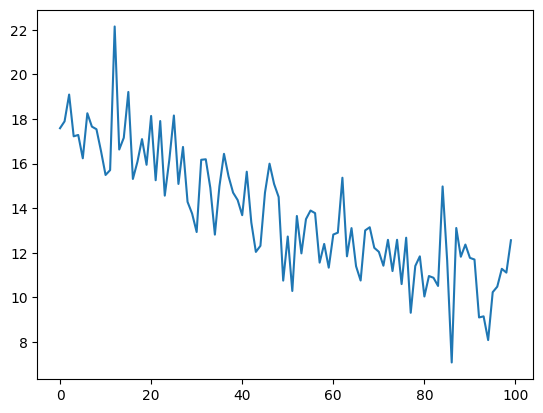

In [453]:
plt.plot(lossi)

In [499]:
# Forward pass with a batch
ix = torch.randint(0, X.shape[0], (32,))
for step in range(10):
    # creating a mini-batch

    # reseting the gradients
    for p in parameters:
        p.grad = None

    # forward pass
    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, BLOCK_SIZE * EMB_SIZE) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    # backward pass
    loss.backward()

    lossi.append(loss.item())

    # updating the parameters
    for p in parameters:
        p.data -= p.grad * 1

271.9584045410156
264.6111145019531
256.9687805175781
249.11721801757812
242.46023559570312
234.8851776123047
229.26449584960938
222.16058349609375
216.2255096435547
210.42933654785156


In [503]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

tensor([0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0010, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011,
        0.0011, 0.0011, 0.0011, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012,
        0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0012, 0.0013, 0.0013, 0.0013,
        0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0013, 0.0014,
        0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014, 0.0014,
        0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015, 0.0015,
        0.0015, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016, 0.0016,
        0.0016, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017, 0.0017,
        0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0018, 0.0019,
        0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0019, 0.0020, 0.0020,
        0.0020, 0.0020, 0.0020, 0.0020, 0.0020, 0.0021, 0.0021, 0.0021, 0.0021,
        0.0021, 0.0021, 0.0021, 0.0022, 

In [508]:
# Try decreasing the learning rate
lri = []
lossi = []
for i in range(1000):
    # minibatch construction
    ix = torch.randint(0, X.shape[0], (32,))

    emb = C[X[ix]]
    h = torch.tanh(emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    print(loss.item())

    for p in parameters:
        p.grad = None

    loss.backward()
    lr = lrs[i]

    for p in parameters:
        p.data += -lr * p.grad

    # track the learning rate and loss
    lri.append(lre[i])
    lossi.append(loss.item())

18.16966438293457
19.31647300720215
18.123950958251953
19.17994499206543
21.603683471679688
21.683908462524414
19.691791534423828
19.236835479736328
20.229135513305664
19.296945571899414
19.100208282470703
19.452009201049805
18.76363182067871
20.931140899658203
20.714250564575195
17.280933380126953
16.81036376953125
23.743568420410156
20.255897521972656
20.207908630371094
17.42962074279785
15.878753662109375
20.092052459716797
15.532265663146973
17.969539642333984
19.542104721069336
20.140382766723633
18.134626388549805
20.41251564025879
17.57929039001465
18.448535919189453
19.62269401550293
15.657282829284668
24.30830192565918
17.974271774291992
19.616741180419922
16.458255767822266
18.53608512878418
18.635929107666016
19.748271942138672
19.759777069091797
18.643171310424805
15.97610855102539
15.629436492919922
19.331687927246094
17.20941925048828
18.875368118286133
17.212366104125977
13.751190185546875
19.20688247680664
17.982492446899414
17.49571418762207
16.6069393157959
16.1115436

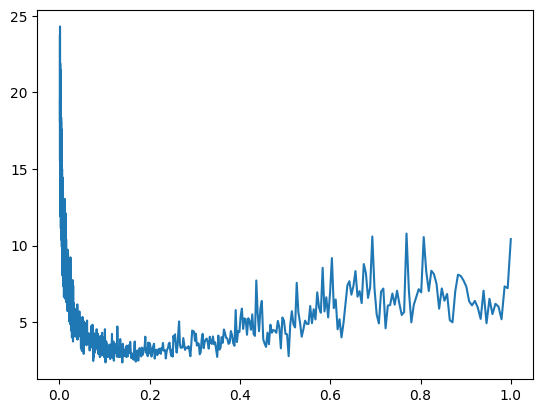

In [513]:
plt.plot(lrs, lossi)

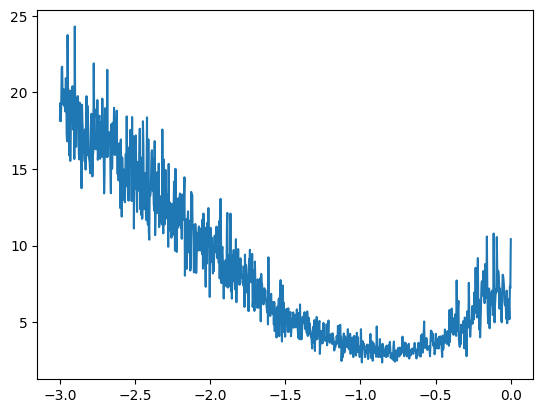

In [512]:
plt.plot(lri, lossi)

In [523]:
# build the dataset
block_size = 3  # context length: how many characters do we take to predict the next one?


def build_dataset(words):
    X, Y = [], []
    for w in words:
        # print(w)
        context = [0] * block_size
        for ch in w + ".":
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            # print(''.join(itos[i] for i in context), '--->', itos[ix])
            context = context[1:] + [ix]  # crop and append

    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y


import random

random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xte, Yte = build_dataset(words[n2:])

torch.Size([182625, 3]) torch.Size([182625])
torch.Size([22655, 3]) torch.Size([22655])
torch.Size([22866, 3]) torch.Size([22866])


In [1]:
# Defining the model

# HYPERPARAMS:
# EMB_SIZE
# BLOCK_SIZE
# batch_size
# learning rate
# number of epochs
# number of hidden units


g = torch.Generator().manual_seed(2147483647)
C = torch.randn((CLASS_COUNT, EMB_SIZE), generator=g)
W1 = torch.randn((BLOCK_SIZE * EMB_SIZE, 100), generator=g)
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, CLASS_COUNT), generator=g)
b2 = torch.randn(CLASS_COUNT, generator=g)

parameters: List[torch.tensor] = [C, W1, b1, W2, b2]

# turning on gradient tracking
for p in parameters:
    p.requires_grad = True

NameError: name 'torch' is not defined

In [525]:
# Try decreasing the learning rate
lossi = []
for i in range(200000):
    # minibatch construction
    ix = torch.randint(0, Xtr.shape[0], (32,))

    emb = C[Xtr[ix]]
    h = torch.tanh(emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Ytr[ix])
    # print(loss.item())

    for p in parameters:
        p.grad = None

    loss.backward()

    for p in parameters:
        if i < 100000:
            p.data -= 0.1 * p.grad
        else:
            p.data -= 0.01 * p.grad

    # track the learning rate and loss
    lossi.append(loss.item())

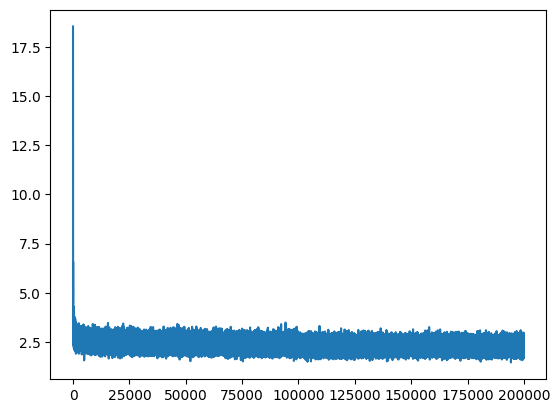

In [526]:
plt.plot(np.arange(200000), lossi)

In [530]:
emb = C[Xtr]
h = torch.tanh(emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.2549, grad_fn=<NllLossBackward0>)

In [531]:
emb = C[Xdev]
h = torch.tanh(emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.2583, grad_fn=<NllLossBackward0>)

In [532]:
emb = C[Xte]
h = torch.tanh(emb.view(-1, emb.shape[1] * emb.shape[2]) @ W1 + b1)
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Yte)
loss

tensor(2.2585, grad_fn=<NllLossBackward0>)

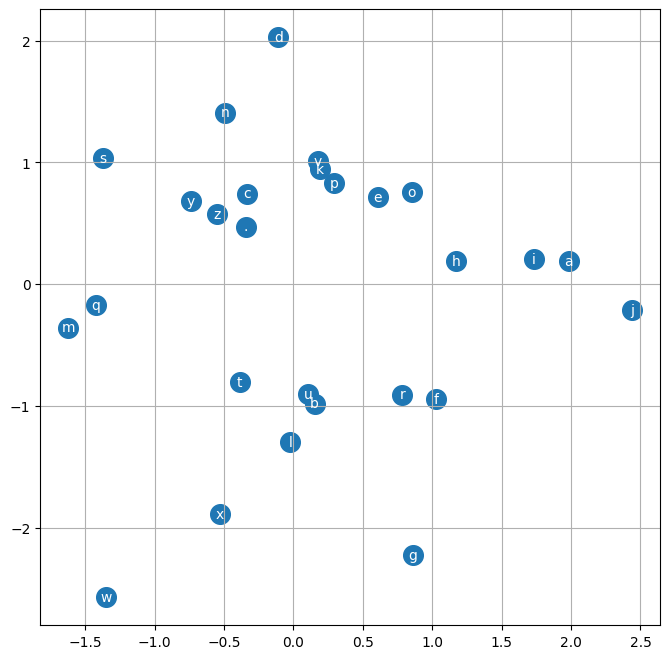

In [534]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
D = torch.randn((CLASS_COUNT, EMB_SIZE), generator=g)
plt.figure(figsize=(8, 8))
plt.scatter(D[:, 0].data, D[:, 1].data, s=200)
for i in range(D.shape[0]):
    plt.text(D[i, 0].item(), D[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

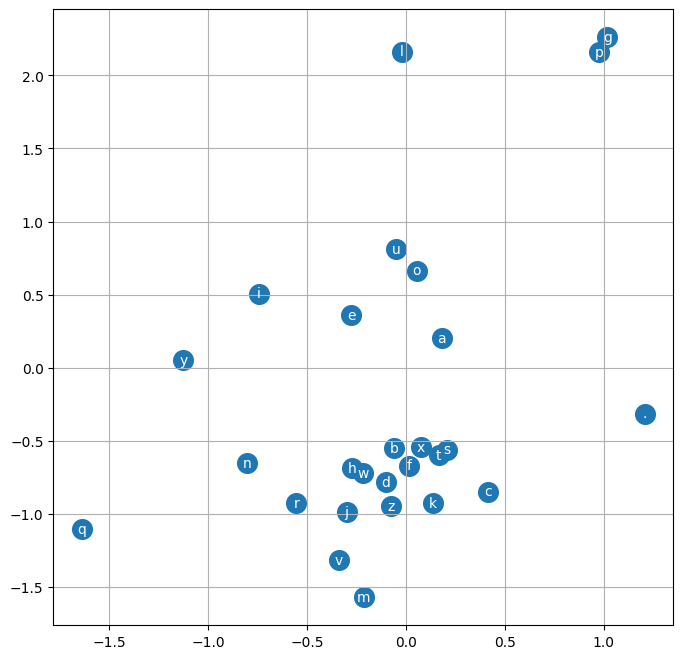

In [533]:
# visualize dimensions 0 and 1 of the embedding matrix C for all characters
plt.figure(figsize=(8, 8))
plt.scatter(C[:, 0].data, C[:, 1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i, 0].item(), C[i, 1].item(), itos[i], ha="center", va="center", color="white")
plt.grid("minor")

In [535]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    out = []
    context = [0] * block_size  # initialize with all ...
    while True:
        emb = C[torch.tensor([context])]  # (1,block_size,d)
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1)
        ix = torch.multinomial(probs, num_samples=1, generator=g).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break

    print("".join(itos[i] for i in out))

carmahela.
jhevi.
kimri.
rehty.
sranden.
jazhuel.
deliah.
jareei.
ner.
kia.
chaiir.
kaleigpu.
bma.
din.
quinn.
sroilea.
jadiquia.
thogisaryxix.
kae.
pilsan.
